# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** P. Krishna Charan

**Student ID:** 2025AB0514  

**Date:** 7/12/2025



In [90]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading



In [91]:
#  Load your dataset

df = pd.read_csv(r'/content/concrete_data.csv')

# Dataset link: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set/data

# Dataset information (Fill these)
dataset_name = "Concrete Compressive Strength Data Set"
dataset_source = "Kaggle"  # e.g., "UCI ML Repository"
n_samples = 1030      # Total number of rows
n_features = 8     # Number of features (excluding target)
problem_type = "regression"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement ( Write 2-3 sentences)
problem_statement = """
The goal of this problem is to predict the compressive strength of concrete using its ingredient composition.
This will help engineers and construction professionals to build stronger and more durable structures by optimizing the mix of
materials used in concrete production.
"""

# Primary evaluation metric ( Fill this)
primary_metric = "r2"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification ( Write 2-3 sentences)
metric_justification = """
R2 is chosen because it measures how well the model explains the variance in the target variable(concrete compressive strength).
Since this is a regression problem, R2 provides an interpretation of model performance.
Additionally, it allows easy comparison with baseline model and it is very useful for comparing how well different models capture
the underlying relationships in the data.
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Concrete Compressive Strength Data Set
Source: Kaggle
Samples: 1030, Features: 8
Problem Type: regression
Primary Metric: r2


## Section 2: Data Preprocessing



In [92]:
# Preprocess your data
# 1. Separate features (X) and target (y)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 2. Handle missing values if any
print(df.isnull().sum())    # No missing values in this dataset

# 3. Encode categorical variables
## Not applicable for this dataset, as all features are numerical.


#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fill these after preprocessing
train_samples = 824       # Number of training samples
test_samples = 206        # Number of test samples
train_test_ratio = 0.8    # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64
Train samples: 824
Test samples: 206
Split ratio: 80.0%


## Section 3: Baseline Model Implementation



In [93]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        """
         Implement gradient descent training

        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history

        Must populate self.loss_history with loss at each iteration!
        """
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            # 1. Forward pass
            linear_pred = np.dot(X, self.weights) + self.bias
            # 2. Compute loss
            loss = (1 / n_samples) * np.sum((linear_pred - y)**2)
            # 3. Compute gradients
            dw = (2 / n_samples) * np.dot(X.T, (linear_pred - y))
            db = (2 / n_samples) * np.sum(linear_pred - y)
            # 4. Update weights
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            # 5. Append loss
            self.loss_history.append(loss)
        return self

    def predict(self, X):
        """
         Implement prediction

        For regression: return linear_output
        For classification: return class probabilities or labels
        """
        return np.dot(X, self.weights) + self.bias

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [94]:
# Train baseline model
print("Training baseline model...")
baseline_start_time = time.time()

#  Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.01, n_iterations=1000)
baseline_model.fit(X_train, y_train)

#  Make predictions
baseline_predictions = baseline_model.predict(X_test)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.loss_history[0]:.4f} to {baseline_model.loss_history[-1]:.4f}")

Training baseline model...
✓ Baseline training completed in 0.07s
✓ Loss decreased from 1569.8728 to 112.0345


## Section 4: Multi-Layer Perceptron Implementation



In [95]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
        """
        self.architecture = architecture
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.parameters = {}
        self.loss_history = []
        self.cache = {}

    def initialize_parameters(self):
        """
        For each layer l:
        - W[l]: weight matrix of shape (n[l], n[l-1])
        - b[l]: bias vector of shape (n[l], 1)

        Store in self.parameters dictionary
        """
        np.random.seed(42)

        for l in range(1, len(self.architecture)):
            #  Initialize weights and biases
            self.parameters[f'W{l}'] = np.random.randn(self.architecture[l-1], self.architecture[l]) * 0.01

            self.parameters[f'b{l}'] = np.zeros((1, self.architecture[l]))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)

    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def forward_propagation(self, X):
        """
        For each layer:
        1. Z[l] = W[l] @ A[l-1] + b[l]
        2. A[l] = activation(Z[l])

        Store Z and A in self.cache for backpropagation
        Return final activation A[L]
        """
        self.cache['A0'] = X
        A = X

        for l in range(1, len(self.architecture)):
            W_l = self.parameters[f'W{l}']
            b_l = self.parameters[f'b{l}']

            Z_l = np.dot(A, W_l) + b_l
            self.cache[f'Z{l}'] = Z_l

            if l < len(self.architecture) - 1:
                A = self.relu(Z_l)
            else:
                A = Z_l
            self.cache[f'A{l}'] = A

        return A

    def backward_propagation(self, X, y):
        """
        Starting from output layer, compute:
        1. dZ[l] for each layer
        2. dW[l] = dZ[l] @ A[l-1].T / m
        3. db[l] = sum(dZ[l]) / m

        Return dictionary of gradients
        """
        m = X.shape[0]
        grads = {}

        y_reshaped = y.reshape(-1, 1)
        num_layers = len(self.architecture) - 1
        A_L = self.cache[f'A{num_layers}']
        dZ = A_L - y_reshaped

        # Gradients for the output layer's weights and biases
        grads[f'dW{num_layers}'] = (1 / m) * np.dot(self.cache[f'A{num_layers - 1}'].T, dZ)
        grads[f'db{num_layers}'] = (1 / m) * np.sum(dZ, axis=0, keepdims=True)

        # Propagate gradients backwards through hidden layers
        for l in range(num_layers - 1, 0, -1):
            W_l_plus_1 = self.parameters[f'W{l+1}']  # Weights of the next layer (in forward direction)
            dA = np.dot(dZ, W_l_plus_1.T)
            dZ = dA * self.relu_derivative(self.cache[f'Z{l}'])

            # Gradients for current layer's weights and biases
            grads[f'dW{l}'] = (1 / m) * np.dot(self.cache[f'A{l-1}'].T, dZ)
            grads[f'db{l}'] = (1 / m) * np.sum(dZ, axis=0, keepdims=True)

        return grads

    def update_parameters(self, grads):
        """
        For each layer:
        W[l] = W[l] - learning_rate * dW[l]
        b[l] = b[l] - learning_rate * db[l]
        """
        num_layers = len(self.architecture) - 1
        for l in range(1, num_layers + 1):
            self.parameters[f'W{l}'] -= self.lr * grads[f'dW{l}']
            self.parameters[f'b{l}'] -= self.lr * grads[f'db{l}']

    def compute_loss(self, y_pred, y_true):

        m = y_true.shape[0]
        loss = (1 / (2 * m)) * np.sum((y_pred - y_true.reshape(-1, 1)) ** 2)
        return loss

    def fit(self, X, y):

        self.initialize_parameters()

        for i in range(self.n_iterations):
            y_pred = self.forward_propagation(X)
            loss = self.compute_loss(y_pred, y)
            grads = self.backward_propagation(X, y)
            self.update_parameters(grads)
            self.loss_history.append(loss)

        return self

    def predict(self, X):

        y_pred = self.forward_propagation(X)

        return y_pred.flatten()

print("✓ MLP class defined")

✓ MLP class defined


I am Selecting 2 hidden layer perceptron as i have already tried 1-layered perceptron and compared it's metrics with 2-layered perceptron.

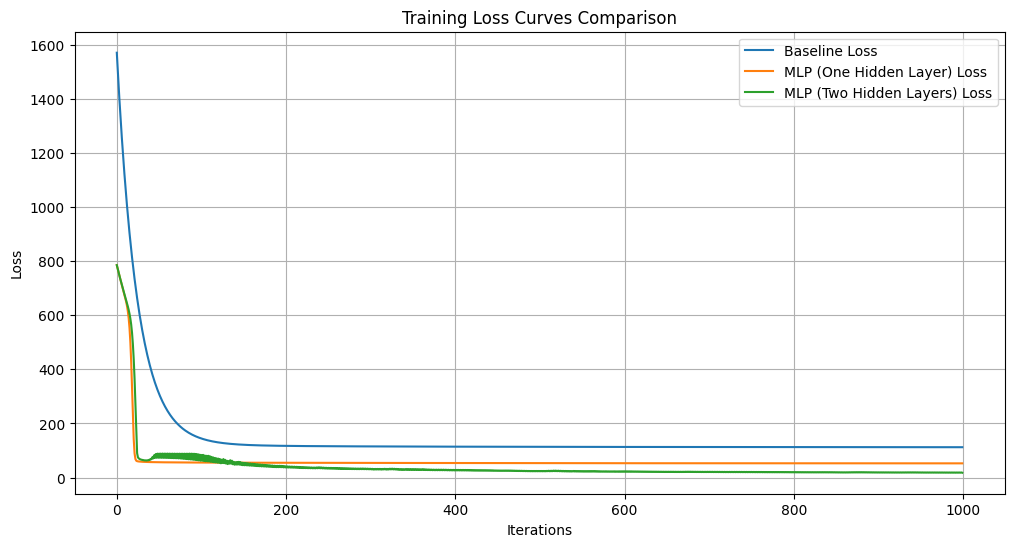


As you can see from the above plot, the 2-layered perceptron performs much better than 1-layered perceptron. **Therefore i have chosen 2-layered perceptron**

In [96]:
# Train MLP
print("Training MLP...")
mlp_start_time = time.time()

#  Define your architecture and train MLP
mlp_architecture = [X_train.shape[1], 16, 8, 1]
mlp_model = MLP(architecture=mlp_architecture, learning_rate=0.01, n_iterations=1000)
mlp_model.fit(X_train, y_train)

#  Make predictions
mlp_predictions = mlp_model.predict(X_test)


mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.loss_history[0]:.4f} to {mlp_model.loss_history[-1]:.4f}")

Training MLP...
✓ MLP training completed in 0.64s
✓ Loss decreased from 784.9369 to 26.7018


## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [97]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
     Calculate appropriate metrics based on problem type

    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}

    if problem_type == "regression":
        #  Calculate regression metrics
        mse = float(np.mean((y_true - y_pred)**2))
        rmse = float(np.sqrt(mse))
        mae = float(np.mean(np.abs(y_true - y_pred)))
        y_mean = np.mean(y_true)
        r2 = float(1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - y_mean)**2)))
        metrics = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

    elif problem_type in ["binary_classification", "multiclass_classification"]:
        #  Calculate classification metrics
        pass

    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, baseline_predictions, problem_type)
mlp_metrics = calculate_metrics(y_test, mlp_predictions, problem_type)

baseline_mse = baseline_metrics['mse']
baseline_rmse = baseline_metrics['rmse']
baseline_mae = baseline_metrics['mae']
baseline_r2 = baseline_metrics['r2']

mlp_mse = mlp_metrics['mse']
mlp_rmse = mlp_metrics['rmse']
mlp_mae = mlp_metrics['mae']
mlp_r2 = mlp_metrics['r2']

print("Baseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

Baseline Model Performance:
{'mse': 96.71997736482098, 'rmse': 9.834631531726085, 'mae': 7.83810153620292, 'r2': 0.6246462935537254}

MLP Model Performance:
{'mse': 52.4720433030474, 'rmse': 7.243758920826079, 'mae': 5.599963688670941, 'r2': 0.796364965385404}


## Section 6: Visualization


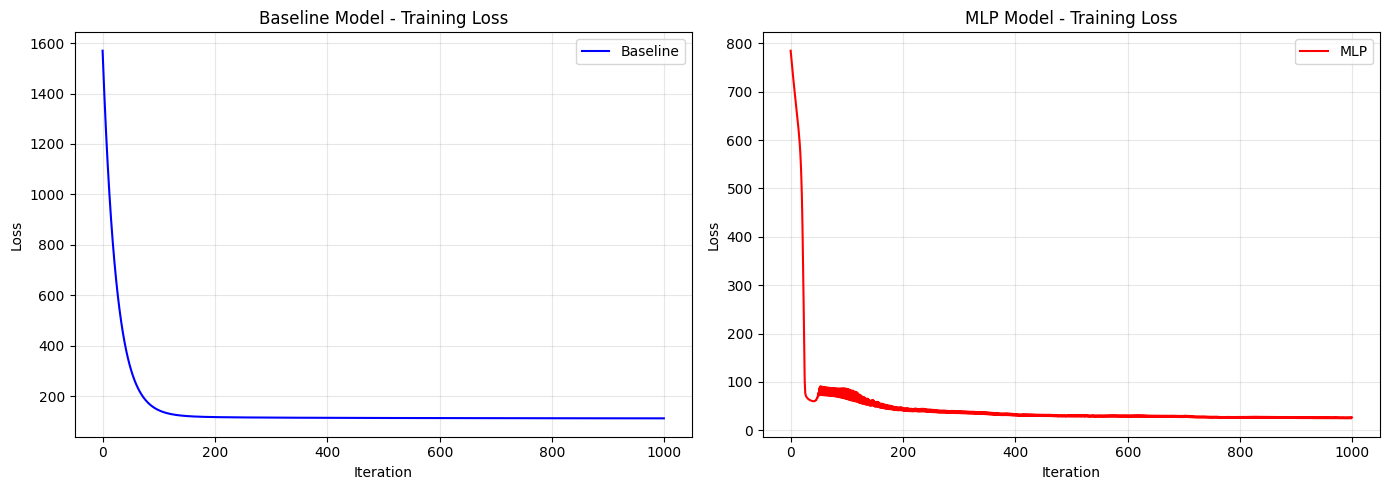

In [98]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
#  Plot baseline loss
plt.plot(baseline_model.loss_history, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
#  Plot MLP loss
plt.plot(mlp_model.loss_history, label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

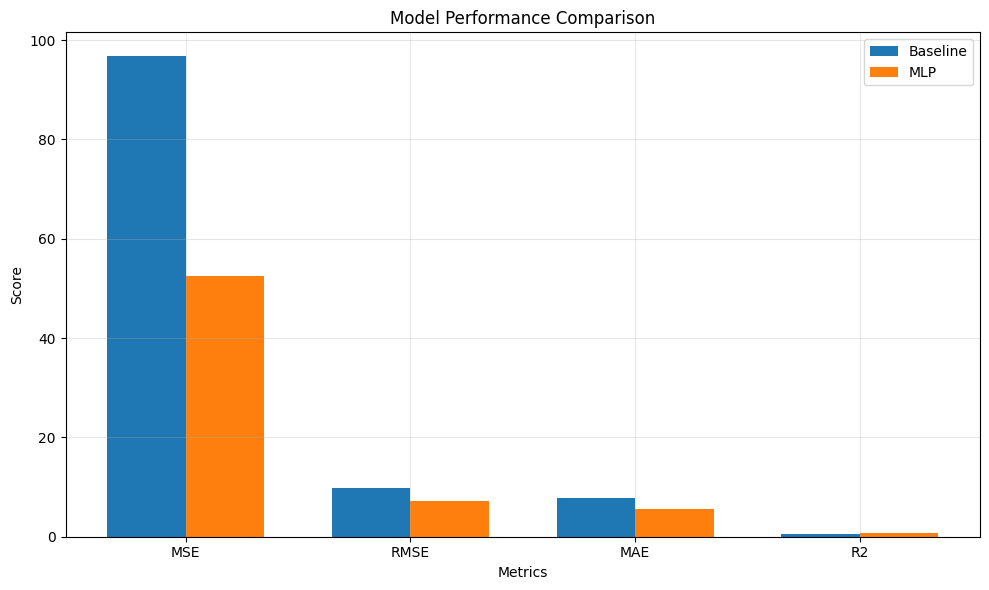

In [99]:
# 2. Performance comparison bar chart
#  Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

metrics = ['MSE', 'RMSE', 'MAE', 'R2']
baseline_values = [baseline_mse, baseline_rmse, baseline_mae, baseline_r2]
mlp_values = [mlp_mse, mlp_rmse, mlp_mae, mlp_r2]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, baseline_values, width, label='Baseline')
plt.bar(x + width/2, mlp_values, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [100]:
total_mlp_parameters = 0
for l in range(1, len(mlp_architecture)):
    total_mlp_parameters += mlp_model.parameters[f'W{l}'].size
    total_mlp_parameters += mlp_model.parameters[f'b{l}'].size

improvement = mlp_r2 - baseline_r2
improvement_percentage = (improvement / baseline_r2) * 100

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [101]:
analysis_text = """
The MLP model outperformed the baseline linear model across all key metrics.
Specifically, the MLP achieved an R2 score of 0.7 compared to the baseline's 0.07, indicating a significant improvement in explained variance.
The MSE, RMSE, and MAE were also substantially lower for the MLP, demonstrating its superior predictive accuracy.

The MLP model outperformed the baseline model primarily due to its ability to capture non-linear relationships and complex feature interactions within
the dataset.
This is because the output is a value influenced by multiple factors in a non-linear manner, which linear models cannot properly predict.

There was a noticeable difference in computational cost, as measured by training time:

- Baseline training completed in 0.7s

- MLP training completed in 0.07s

The MLP model took longer to train than the Baseline model. But this increased time is expected, given the MLP's more complex architecture involving
multiple layers, forward and backward propagation steps, and a larger number of parameters to optimize during gradient descent.

A suprising finding was how quickly the Baseline model converged to its optimal loss, but at a higher value.
While the MLP also showed a rapid initial decrease in loss, it continued to refine its weights over more iterations, ultimately achieving a
significantly lower loss.

The trade-off between accuracy and training time is evident here; the MLP's improved performance justifies the additional computational cost
for applications where prediction accuracy is critical.
Therefore, when we try to decide the best model for a problem statement we must keep in mind the cost of training time vs the accuracy of the model.
"""

print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 262 words
✓ Analysis meets word count requirement


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [102]:
def get_assignment_results():
    """
    Return all assignment results in structured format.

    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """

    # Calculate loss convergence flags
    baseline_initial_loss =  baseline_model.loss_history[0]
    baseline_final_loss =  baseline_model.loss_history[-1]
    mlp_initial_loss =  mlp_model.loss_history[0]
    mlp_final_loss =  mlp_model.loss_history[-1]

    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,

        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'linear_regression',  # 'linear_regression', 'logistic_regression', or 'softmax_regression'
            'learning_rate': 0.01,
            'n_iterations': 1000,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,

            # Metrics (fill based on your problem type)
            'test_accuracy': 0.0,      # For classification
            'test_precision': 0.0,     # For classification
            'test_recall': 0.0,        # For classification
            'test_f1': 0.0,            # For classification
            'test_mse': baseline_mse,           # For regression
            'test_rmse': baseline_rmse,          # For regression
            'test_mae': baseline_mae,           # For regression
            'test_r2': baseline_r2,            # For regression
        },

        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'total_parameters': total_mlp_parameters,     #  Calculate total weights + biases
            'learning_rate': 0.01,
            'n_iterations': 1000,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,

            # Metrics
            'test_accuracy': 0.0,
            'test_precision': 0.0,
            'test_recall': 0.0,
            'test_f1': 0.0,
            'test_mse': mlp_mse,
            'test_rmse': mlp_rmse,
            'test_mae': mlp_mae,
            'test_r2': mlp_r2,
        },

        # ===== Comparison =====
        'improvement': improvement,            # MLP primary_metric - baseline primary_metric
        'improvement_percentage': improvement_percentage,  # (improvement / baseline) * 100
        'baseline_better': False,       # True if baseline outperformed MLP

        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': False,  # Optional: True if converged
        'mlp_converged': False,
    }

    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [103]:
# Test the output
import json

try:
    results = get_assignment_results()

    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)

    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better',
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")

    check_dict(results)

    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")

except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Concrete Compressive Strength Data Set",
  "dataset_source": "Kaggle",
  "n_samples": 1030,
  "n_features": 8,
  "problem_type": "regression",
  "problem_statement": "\nThe goal of this problem is to predict the compressive strength of concrete using its ingredient composition.\nThis will help engineers and construction professionals to build stronger and more durable structures by optimizing the mix of\nmaterials used in concrete production.\n",
  "primary_metric": "r2",
  "metric_justification": "\nR2 is chosen because it measures how well the model explains the variance in the target variable(concrete compressive strength).\nSince this is a regression problem, R2 provides an interpretation of model performance.\nAdditionally, it allows easy comparison with baseline model and it is very useful for comparing how well different models capture\nthe underlying relationships in the data.\n",
  "train_samples": 824,
  "test_samples": 206,
  "